In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble._forest import RandomForestRegressor
# import Library
def randomForest(trainFeatures, trainResponses, testFeatures, maxFeatures = 'log2', nTree=100):
    ## Settings of random forests regressor
    regModel = RandomForestRegressor(n_estimators=nTree, max_features=maxFeatures)    
    ## Train the random forests regressor
    regModel.fit(trainFeatures, trainResponses)
    ## Prediction
    testResponsesPred = regModel.predict(testFeatures)
    importances = regModel.feature_importances_
    return regModel, testResponsesPred,importances



array([0.00260537, 0.04266594, 0.05246556, 0.05633504, 0.1814154 ,
       0.10727273, 0.10557547, 0.01217693, 0.10816032, 0.08272957,
       0.18441745, 0.06418021])

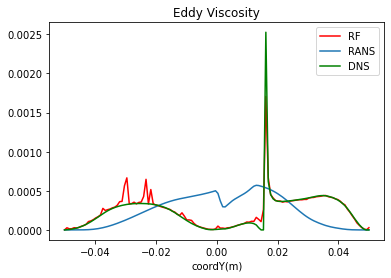

In [16]:
# Features come from openfoam RANS results
trainFeatures = np.load('./data/trainFeatures.npy')
testFeatures = np.load('./data/testFeatures.npy')
# testFeatures come from basilisk DNS results (eddy viscosity)
trainResponse = np.load('./data/trainResponse.npy')
# eddy viscosity from RANS for comparison (baseline)
RANSTEST = np.load('./data/RANSTEST.npy')
# eddy viscosity from DNS for comparison) (groundtruth)
DNSTEST = np.load('./data/DNSTEST.npy')

model,TestResponsesPred ,importances= randomForest(trainFeatures, trainResponse, testFeatures, 10, 200)

ycoord = np.linspace(-0.05,0.05,128)
plt.plot(ycoord,TestResponsesPred,label = 'RF',color = 'r')
plt.plot(ycoord,RANSTEST,label = 'RANS')
plt.plot(ycoord,DNSTEST,label = 'DNS',color = 'g')
plt.xlabel('coordY(m)')
plt.title('Eddy Viscosity')
plt.legend()
importances